<a href="https://colab.research.google.com/github/devclo/Intro-To-Artificial-Intelligence/blob/Foreign-Whipsers/Foreign_Whispers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Milestone 1: Source Videos and Closed Captions (10 points)

Write a python API that will download the video and its closed captions from youtube.

Access 10 videos from the 60 minutes channel and more specifically from the Interviews playlist and download them to your local environment.

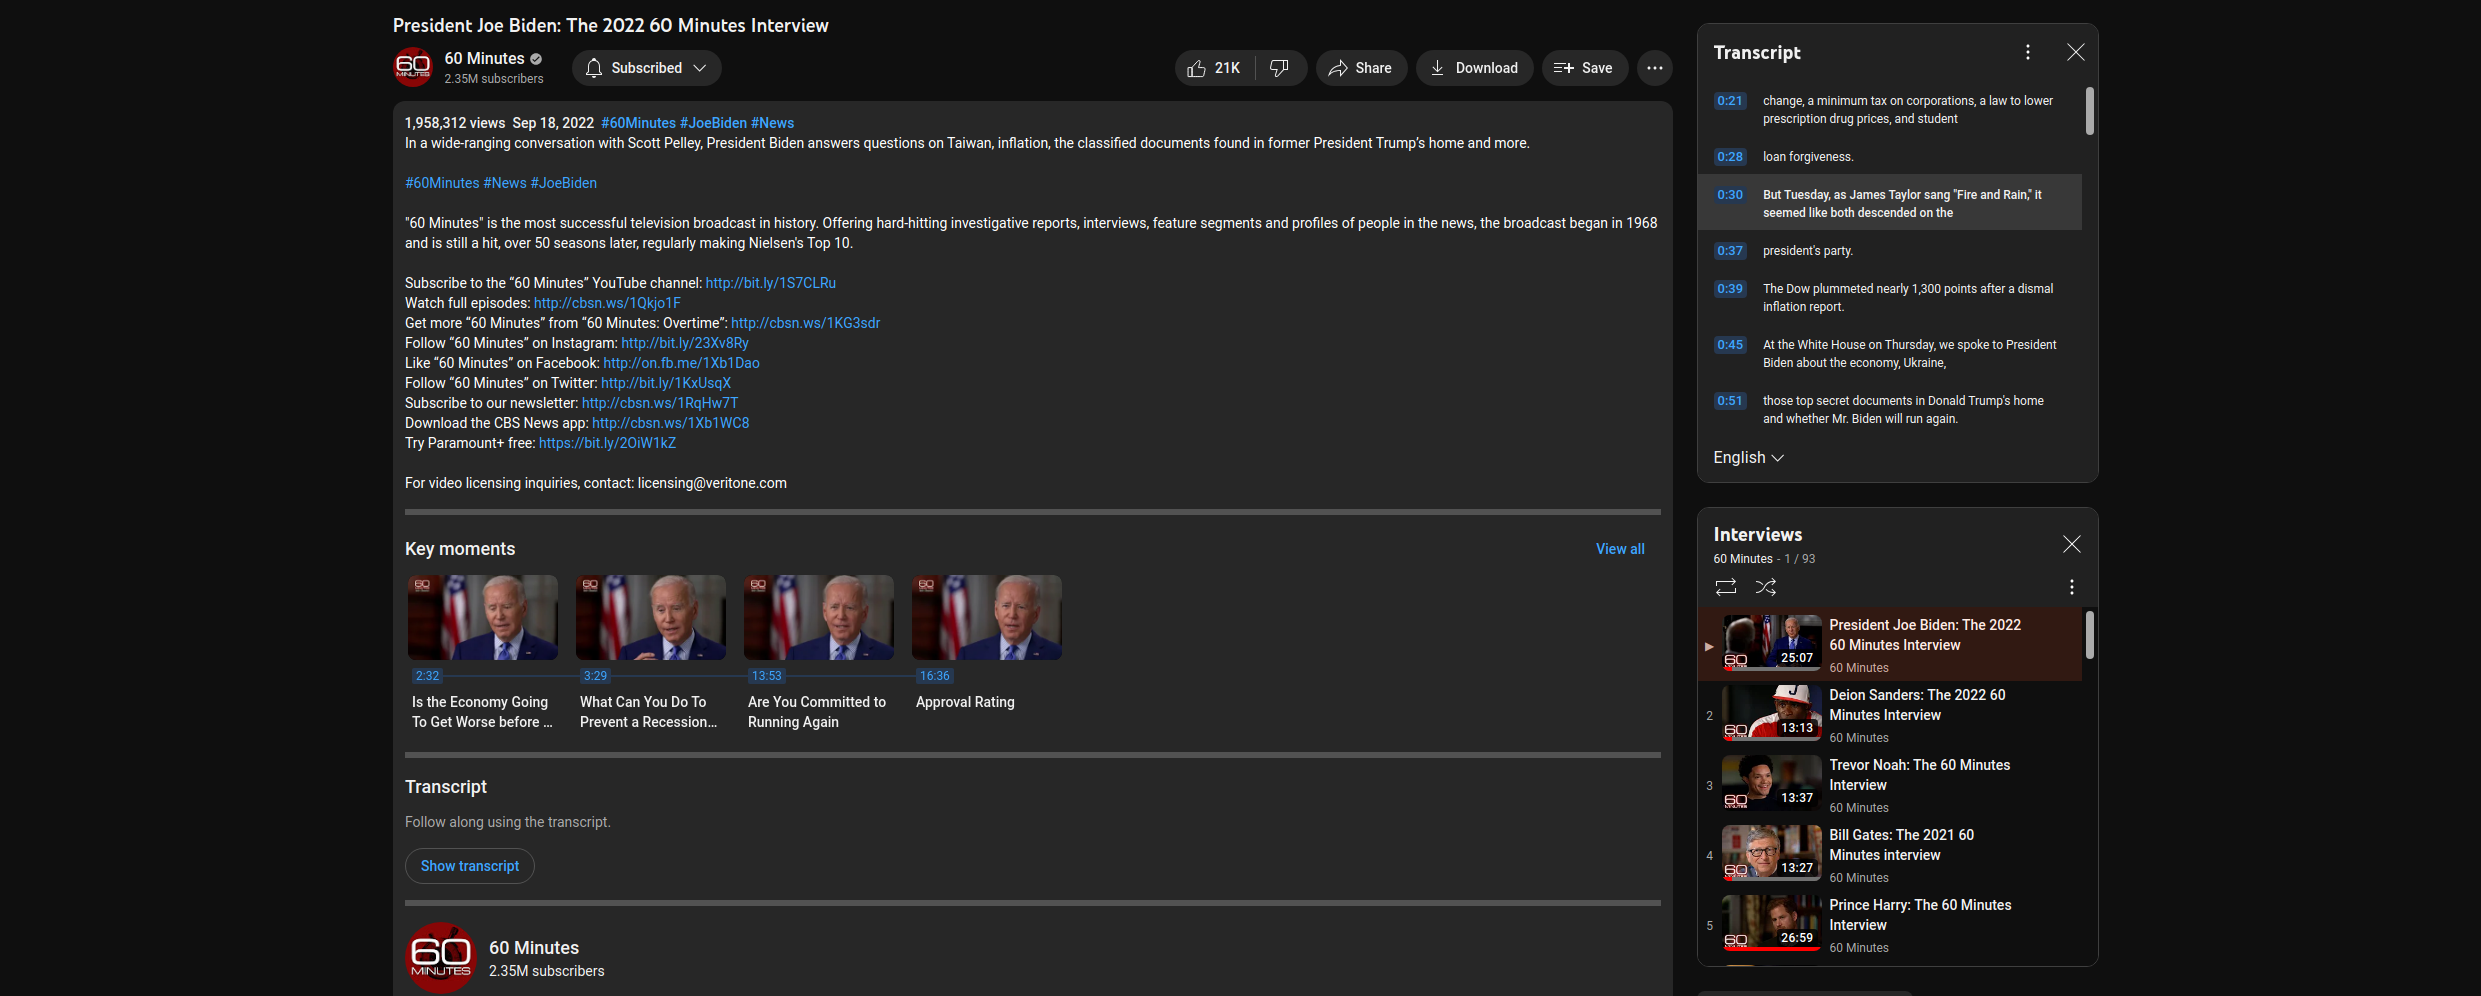


The youtube service give you the ability of downloading the closed captions of a video. You can do that by clicking on the three dots on the bottom right of the video and then clicking on the “Open transcript” option. The downloaded subtitles/closed captions will serve as the ground truth for the English language.



In [1]:
!apt update -y
!apt upgrade -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/

In [2]:
!pip install -U yt-dlp
!pip install ffmpeg
!pip install srt
!pip install -U openai-whisper
!pip install setuptools-rust
!pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=86f604c05c0b07b7f8ea2abfabf2241d764d845684d11b2a2cad6a4aee2954e1
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
  Preparing metadata (setup.py) ... done
  Created wheel for srt: filename=srt-3.5.3-py3-none-any.whl size=22428 sha256=f048897d465a39e3faa77fe3ec19591bb5866fd4b4c0375a7fb739d14707820e
  Stored in directory: /root/.cache/pip/wheels/d7/31/a1/18e1e7e8bfdafd19e6803d7eb919b563dd1

In [3]:
import yt_dlp as ydlp
import random
import time

downloaded_videos = []

def my_hook(d):
    if d['status'] == 'downloading':
        # You can add more detailed progress information here if needed
        print(f"\rDownloading: {d['_percent_str']} % of {d['_total_bytes_str']}", end='')

    if d['status'] == 'finished':
        print("\nDone downloading, now converting ...")

def video_and_captions_download(playlist_url, number_of_videos=10):
    """Download videos and captions from a YouTube playlist."""

    global downloaded_videos
    #Saving this for later, in case I want to use it for another project
    ydl_opts = {
        'postprocessors': [{
            'key': 'FFmpegVideoConvertor',
            'preferedformat': 'mp4',
        },
        {
            'key': 'FFmpegSubtitlesConvertor',
            'format': 'srt'
        }],
        'writeautomaticsub': True,
        'subtitleslangs': ['en'],
        'quiet': False,
        'outtmpl': '%(title)s.%(ext)s',
        'noplaylist': False,
        'progress_hooks': [my_hook],
        'extract_flat': True
    }

    with ydlp.YoutubeDL(ydl_opts) as ydl:
        result = ydl.extract_info(playlist_url, download=False)

        if 'entries' in result:
            videos = result['entries']
            random.shuffle(videos)
            selected_videos = videos[:number_of_videos]

            for video in selected_videos:
                try:
                    time.sleep(5)
                    print(f'\n\033[1mDownloading video: {video["title"]}\033[0m\n')
                    ydl.download([video['url']])

                    # Append the video title to our list
                    downloaded_videos.append(video['title'])

                except Exception as e:
                    print(f"\nAn error occurred while downloading video: {video['title']}. Error: {str(e)}")

            print("\nDownload completed!")
        else:
            print("No entries found in the playlist.")


In [ ]:
# Ask the user to input the playlist URL
playlist_url = input("Please enter the YouTube playlist URL: ")

# Call the function with the URL input by the user
video_and_captions_download(playlist_url)

In [ ]:
!ls -lh

# #Milestone 2: Speech to Text (20 points)


Write a Python API that will separate the audio from the video and convert it to text. For this you will use libraries such as openai/whisper

Whisper is a general-purpose speech recognition model. It is trained on a large dataset of diverse audio and is also a multitasking model that can perform multilingual speech recognition, speech translation, and language identification.




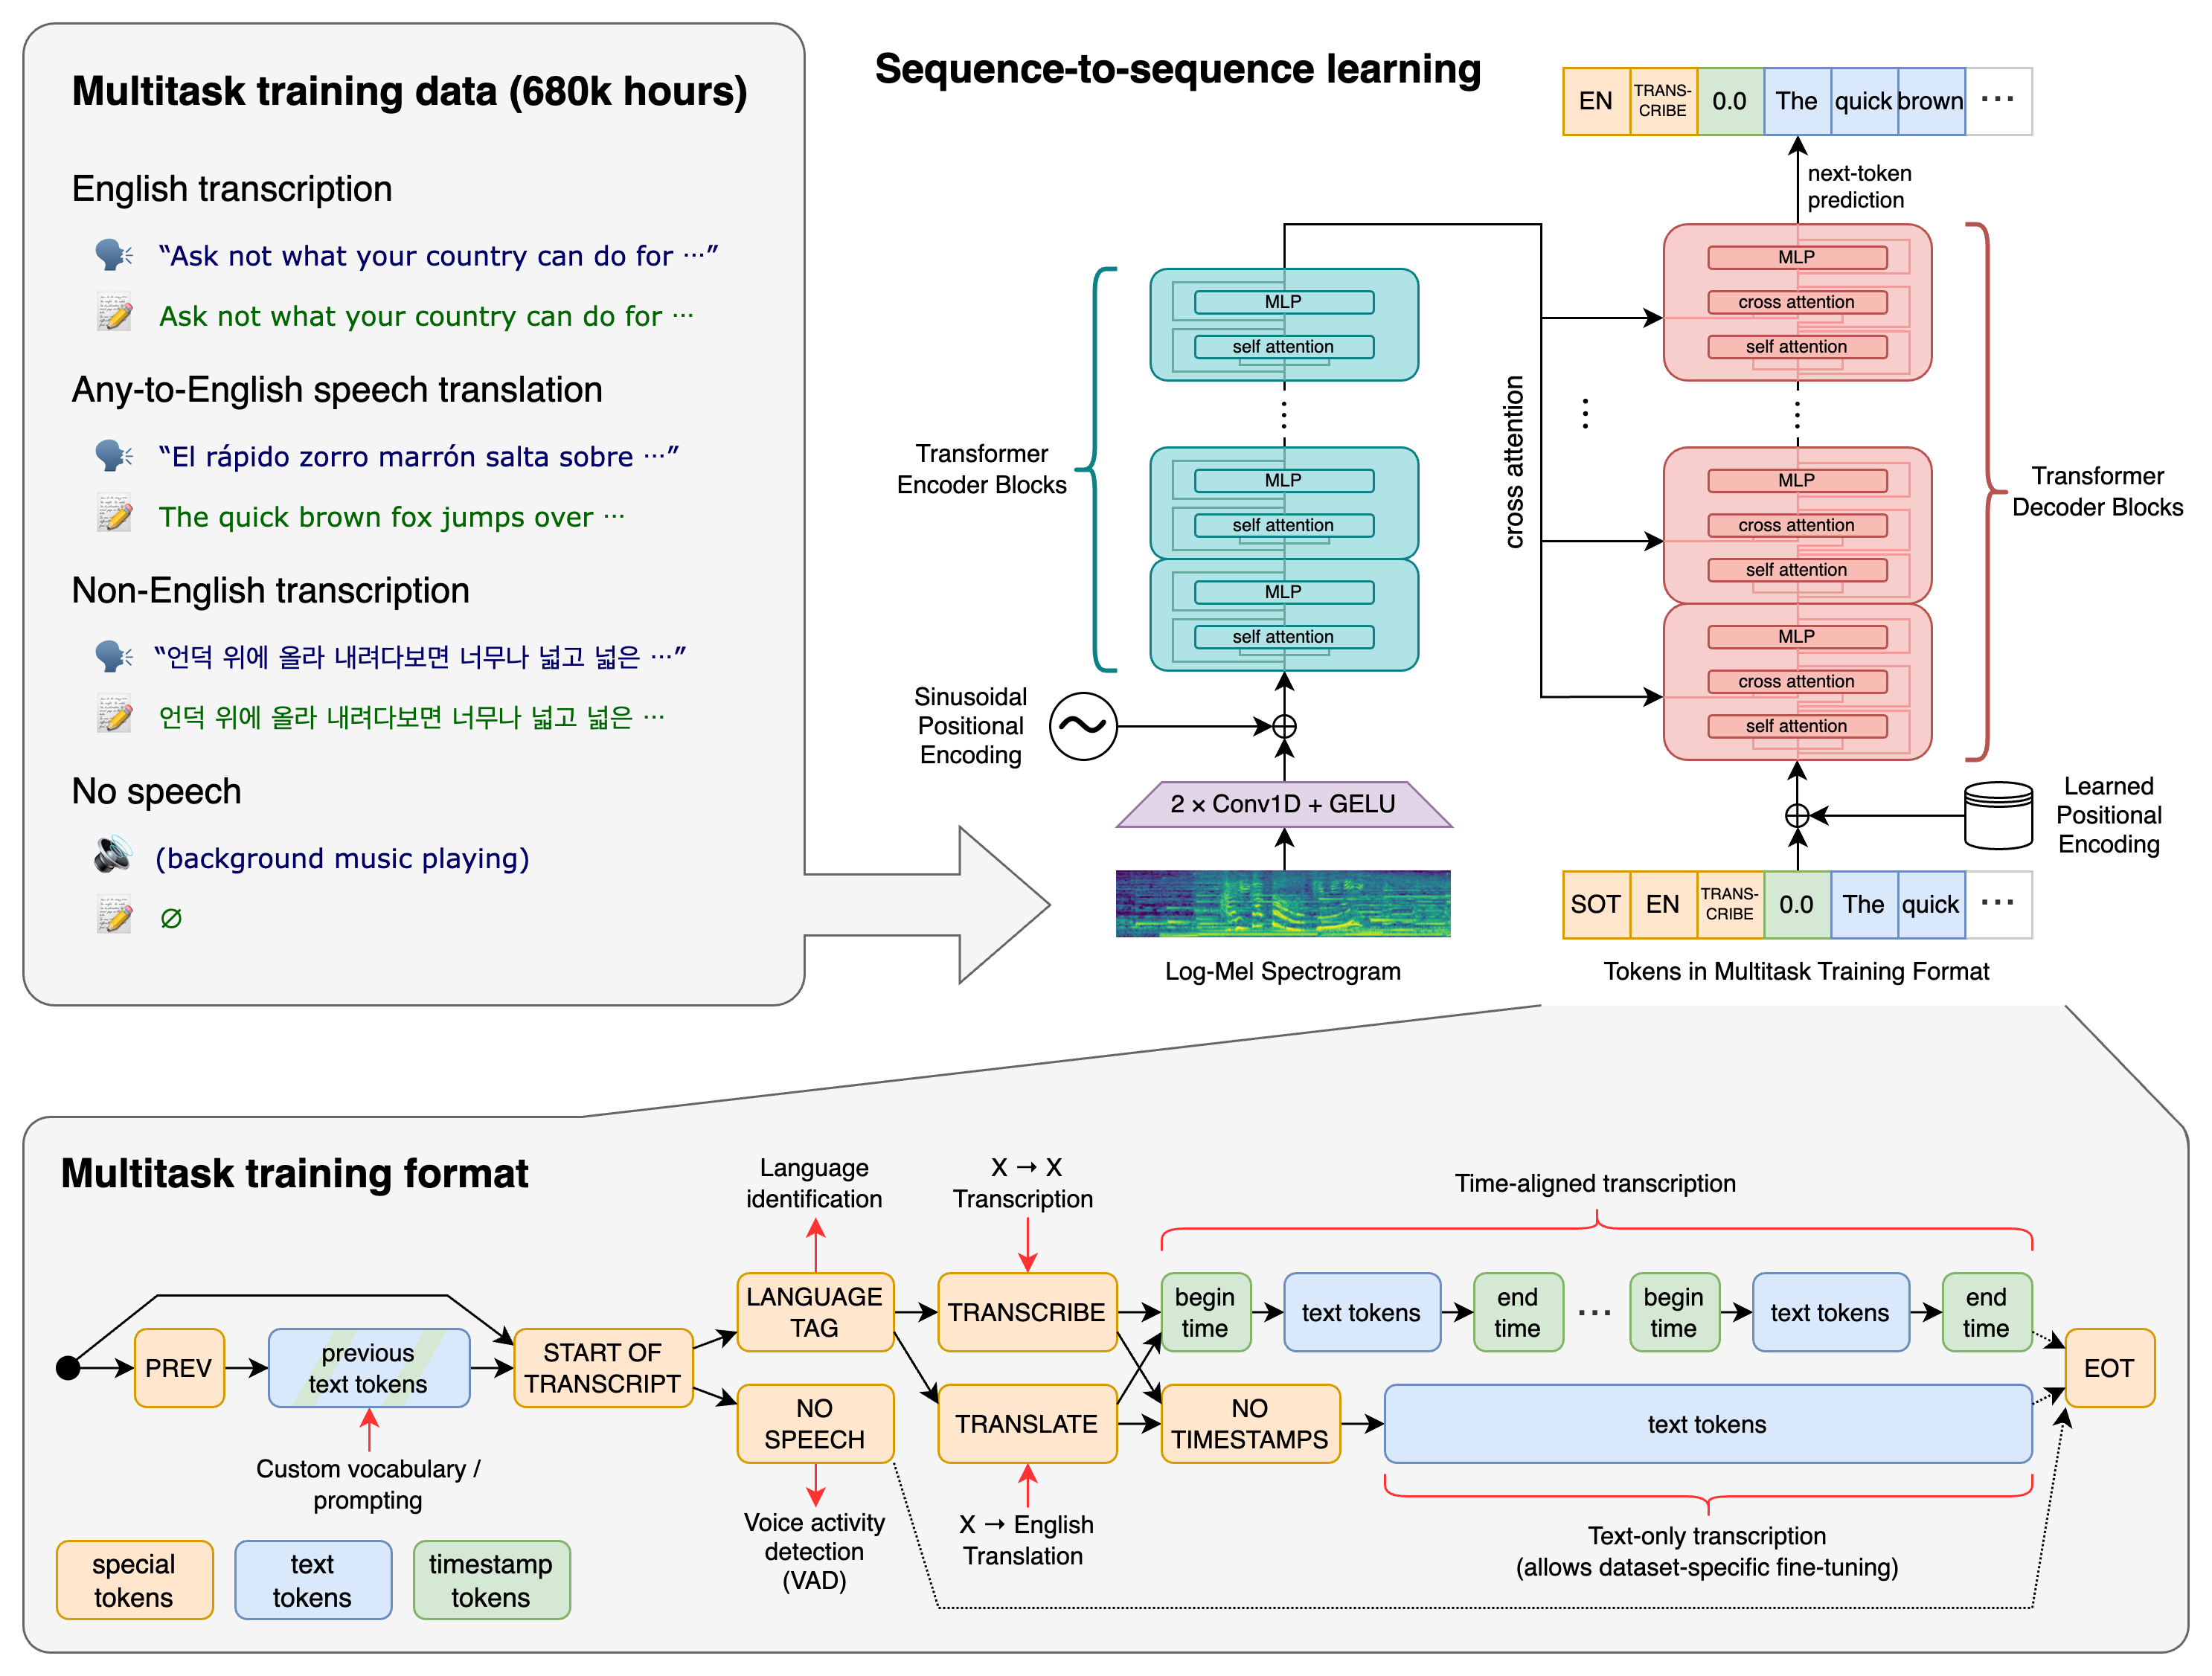

In [ ]:
import os
import whisper
import yt_dlp
from moviepy.editor import VideoFileClip

def sanitize_filename(filename):
    # Replace special characters in filename with underscore
    return "".join([c if c.isalnum() or c in " .-_" else "_" for c in filename])

def download_video(video_url, output_path='downloads'):
    # Create the output directory if it doesn't exist
    if not os.path.isdir(output_path):
        os.makedirs(output_path)

    ydl_opts = {
        'format': 'bestvideo+bestaudio/best',
        'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
        'merge_output_format': 'mp4',  # Ensure the final file is in mp4 format
    }

    # Use yt_dlp to download the video
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(video_url, download=True)
        # Get the filename that yt_dlp has actually saved the file as
        filename = ydl.prepare_filename(info_dict)
        # Check if the file exists using the actual filename
        if not os.path.exists(filename):
            # Try replacing special characters if the file is not found
            filename = sanitize_filename(filename)
            if not os.path.exists(filename):
                raise FileNotFoundError(f"The video file {filename} was not found. Download may have failed.")
        return filename

def extract_audio(video_path):
    # Extract the audio from the video
    video_clip = VideoFileClip(video_path)
    audio_path = video_path + ".wav"
    video_clip.audio.write_audiofile(audio_path)
    return audio_path

def transcribe_audio(whisper_model, audio_path):
    # Transcribe the audio file using Whisper
    result = whisper_model.transcribe(audio_path)
    return result["text"]

# Function to call the video download and transcription
def transcribe_video_from_url(video_url):
    # Download the video and get the filename
    video_path = download_video(video_url)
    print(f"Downloaded video path: {video_path}")

    # Extract audio from the video
    audio_path = extract_audio(video_path)
    print(f"Extracted audio path: {audio_path}")

    # Load the Whisper model
    model = whisper.load_model("base")

    # Transcribe the audio and get the transcription text
    transcription = transcribe_audio(model, audio_path)
    print(f"Transcription: {transcription}")

    # Clean up the audio file
    os.remove(audio_path)

# Main program execution
if __name__ == "__main__":
    # Replace this with the actual URL input from the user
    input_url = input("Please enter the YouTube video URL: ")
    # Call the function with the URL
    transcribe_video_from_url(input_url)


#Milestone 3

Write a Python API that will translate the text from English to a language of your choosing. Please note you need to select the language from the list of languages that can be served by the TTS Milestone. You can use any library you want for this task except commercial ones that include Google Translate, Microsoft Translate, OpenAI etc.



The goal would be to translate from english to german.

In [ ]:
!pip install translate

In [ ]:
import os
import whisper
import yt_dlp
from moviepy.editor import VideoFileClip
from translate import Translator


def sanitize_filename(filename):
    # Replace special characters in filename with underscore
    return "".join([c if c.isalnum() or c in " .-_" else "_" for c in filename])

def download_video(video_url, output_path='downloads'):
    # Create the output directory if it doesn't exist
    if not os.path.isdir(output_path):
        os.makedirs(output_path)

    ydl_opts = {
        'format': 'bestvideo+bestaudio/best',
        'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
        'merge_output_format': 'mp4',  # Ensure the final file is in mp4 format
    }

    # Use yt_dlp to download the video
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(video_url, download=True)
        # Get the filename that yt_dlp has actually saved the file as
        filename = ydl.prepare_filename(info_dict)
        # Check if the file exists using the actual filename
        if not os.path.exists(filename):
            # Try replacing special characters if the file is not found
            filename = sanitize_filename(filename)
            if not os.path.exists(filename):
                raise FileNotFoundError(f"The video file {filename} was not found. Download may have failed.")
        return filename

def extract_audio(video_path):
    # Extract the audio from the video
    video_clip = VideoFileClip(video_path)
    audio_path = video_path + ".wav"
    video_clip.audio.write_audiofile(audio_path)
    return audio_path

def transcribe_audio(whisper_model, audio_path):
    # Transcribe the audio file using Whisper
    result = whisper_model.transcribe(audio_path)
    return result["text"]

def translate_text(text, target_language='de'):
    # Translate text from English to the target language (default is German)
    translator = Translator(to_lang=target_language)
    return translator.translate(text)



# Function to call the video download and transcription
def transcribe_video_from_url(video_url):
    # Download the video and get the filename
    video_path = download_video(video_url)
    print(f"Downloaded video path: {video_path}")

    # Extract audio from the video
    audio_path = extract_audio(video_path)
    print(f"Extracted audio path: {audio_path}")

    # Load the Whisper model
    model = whisper.load_model("base")

    # Transcribe the audio and get the transcription text
    transcription = transcribe_audio(model, audio_path)
    print(f"Transcription: {transcription}")

    # Translate the transcription to German
    translation = translate_text(transcription)
    print(f"Translation (German): {translation}")

    # Clean up the audio file
    os.remove(audio_path)

# Main program execution
if __name__ == "__main__":
    # Replace this with the actual URL input from the user
    input_url = input("Please enter the YouTube video URL: ")
    # Call the function with the URL
    transcribe_video_from_url(input_url)
